# Without PCA LDA

In [146]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit', 'Visit_int']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Preprocessing pipeline for numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier using original features
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")



Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.6314
Precision: 0.5835
Recall: 0.6314
F1-score: 0.5831

Logistic Regression:
Training Accuracy: 0.9937
Testing Accuracy: 0.8467
Precision: 0.8584
Recall: 0.8467
F1-score: 0.8420


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



AdaBoost:
Training Accuracy: 0.4843
Testing Accuracy: 0.4599
Precision: 0.4335
Recall: 0.4599
F1-score: 0.4051

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.4380
Precision: 0.4413
Recall: 0.4380
F1-score: 0.4358

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.6715
Precision: 0.6726
Recall: 0.6715
F1-score: 0.6512

KNN:
Training Accuracy: 0.7398
Testing Accuracy: 0.5839
Precision: 0.6053
Recall: 0.5839
F1-score: 0.5650

SVM:
Training Accuracy: 0.9781
Testing Accuracy: 0.8248
Precision: 0.8549
Recall: 0.8248
F1-score: 0.8123

Naïve Bayes:
Training Accuracy: 0.5549
Testing Accuracy: 0.4854
Precision: 0.6255
Recall: 0.4854
F1-score: 0.4778

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.6496
Precision: 0.6310
Recall: 0.6496
F1-score: 0.6157


# PCA components are linear combinations of original feature

In [147]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit','Visit_int']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Preprocessing pipeline for numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=15)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:\n", explained_variance)

# Print the most valuable features for each principal component
components = pca.components_
most_valuable_features = [np.abs(components[i]).argmax() for i in range(components.shape[0])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]

print("\nMost valuable features for each principal component:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Principal Component {i+1}: {feature}")

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier using PCA reduced features
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train)
    y_train_pred = clf.predict(X_train_pca)
    y_test_pred = clf.predict(X_test_pca)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")


Explained variance ratio of each principal component:
 [0.18145068 0.10214408 0.07702863 0.07035613 0.0510928  0.03636975
 0.0276162  0.0270854  0.02496686 0.02160818 0.02045171 0.01909936
 0.01774931 0.01668958 0.01506396]

Most valuable features for each principal component:
Principal Component 1: NP3RIGN
Principal Component 2: NP3FTAPL
Principal Component 3: NP3RIGN
Principal Component 4: NP3RTCON
Principal Component 5: NP3RIGN
Principal Component 6: NP1SLPN
Principal Component 7: NP3POSTR
Principal Component 8: NP2SALV
Principal Component 9: NP3TTAPR
Principal Component 10: NP3RIGRL
Principal Component 11: NP2HWRT
Principal Component 12: NP1URIN
Principal Component 13: NP1PAIN
Principal Component 14: NP1PAIN
Principal Component 15: NP3RTARU

Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.7920
Precision: 0.8023
Recall: 0.7920
F1-score: 0.7779

Logistic Regression:
Training Accuracy: 0.9545
Testing Accuracy: 0.8942
Precision: 0.9108
Recall: 0.8942
F1-score: 0.8889

AdaB

B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.8723
Precision: 0.8754
Recall: 0.8723
F1-score: 0.8687

KNN:
Training Accuracy: 0.8009
Testing Accuracy: 0.7153
Precision: 0.7293
Recall: 0.7153
F1-score: 0.7030

SVM:
Training Accuracy: 0.9624
Testing Accuracy: 0.8248
Precision: 0.8420
Recall: 0.8248
F1-score: 0.8150

Naïve Bayes:
Training Accuracy: 0.8197
Testing Accuracy: 0.7664
Precision: 0.7699
Recall: 0.7664
F1-score: 0.7639

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.8650
Precision: 0.8720
Recall: 0.8650
F1-score: 0.8603


In [148]:
# 1. Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:\n", explained_variance)

Explained variance ratio of each principal component:
 [0.18145068 0.10214408 0.07702863 0.07035613 0.0510928  0.03636975
 0.0276162  0.0270854  0.02496686 0.02160818 0.02045171 0.01909936
 0.01774931 0.01668958 0.01506396]


Cumulative explained variance:
 [0.18145068 0.28359477 0.3606234  0.43097953 0.48207233 0.51844208
 0.54605828 0.57314368 0.59811055 0.61971873 0.64017044 0.6592698
 0.67701911 0.69370869 0.70877265]


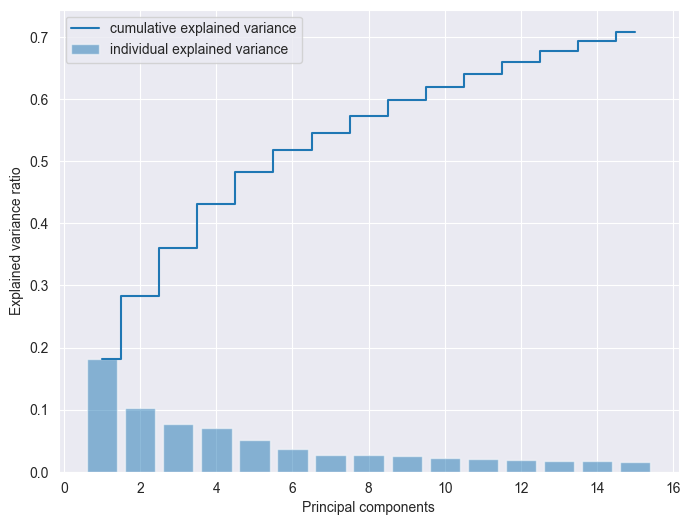

In [149]:
# 2. Cumulative Variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)

# Plot the explained variance ratio and cumulative variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [150]:
len(X_train_pca)

638

In [151]:
len(X_test_pca)

274

In [152]:
components = pca.components_
feature_names = X.columns

print("\nTop 20 features for each principal component:")
for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:5]
    top_features = feature_names[top_features_indices]
    print(f"\nPrincipal Component {i+1}:")
    for feature in top_features:
        print(f"{feature}")


Top 20 features for each principal component:

Principal Component 1:
NP3RIGN
NP3FTAPL
NP3HMOVL
NP3TTAPL
NP2SALV

Principal Component 2:
NP3FTAPL
NP3PRSPL
NP3RTARU
NP3HMOVL
NP3TTAPL

Principal Component 3:
NP3RIGN
NP1SLPN
NP3RTCON
NP1FATG
NP3RTARU

Principal Component 4:
NP3RTCON
NP3RTARU
NP2TRMR
NP3RTALU
NP1SLPN

Principal Component 5:
NP3RIGN
NP3HMOVR
NP3PRSPR
NP3FTAPR
NP3LGAGR

Principal Component 6:
NP1SLPN
NP2SALV
NP2SPCH
NP1PAIN
NP2HWRT

Principal Component 7:
NP3POSTR
NP2HWRT
NP3GAIT
NP1URIN
NP3BRADY

Principal Component 8:
NP2SALV
NP1SLPN
NP2HWRT
NP1ANXS
NP1DPRS

Principal Component 9:
NP3TTAPR
NP3LGAGR
NP3LGAGL
NP3TTAPL
NP3RIGLU

Principal Component 10:
NP3RIGRL
NP3RIGLL
NP2HWRT
NP3RIGLU
NP2SALV

Principal Component 11:
NP2HWRT
NP1ANXS
NP1DPRS
NP2SALV
NP1PAIN

Principal Component 12:
NP1URIN
NP1PAIN
NP1SLPN
NP3POSTR
NP3FACXP

Principal Component 13:
NP1PAIN
NP1URIN
NP1FATG
NP1CNST
NP2SALV

Principal Component 14:
NP1PAIN
NP2RISE
NP3KTRMR
NP3KTRML
NP3PTRMR

Principal Component

In [153]:
top_features_union = set()

for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:5]
    top_features = feature_names[top_features_indices]
    top_features_union.update(top_features)

# Print the union of top features and its length
print("\nUnion of top 20 features for each principal component:")
print(top_features_union)
print(f"\nLength of union features: {len(top_features_union)}")


Union of top 20 features for each principal component:
{'NP1FATG', 'NP3RTALU', 'NP3PRSPR', 'NP3BRADY', 'NP3RIGLU', 'NP3TTAPL', 'NP1PAIN', 'NP3KTRML', 'NP3FACXP', 'NP3RTARU', 'NP2SALV', 'NP3PRSPL', 'NP3RIGRL', 'NP3FTAPL', 'NP1ANXS', 'NP1SLPN', 'NP3GAIT', 'NP3LGAGL', 'NP3FTAPR', 'NP3RIGLL', 'NP1CNST', 'NP2SPCH', 'NP2TRMR', 'NP3KTRMR', 'NP3RIGN', 'NP3PTRMR', 'NP2HWRT', 'NP3TTAPR', 'NP2RISE', 'NP3HMOVR', 'NP3POSTR', 'NP3LGAGR', 'NP3RTCON', 'NP1DPRS', 'NP3HMOVL', 'NP1URIN'}

Length of union features: 36


In [154]:
# 3. Principal Component Scores
print("Principal Component Scores (first 5 samples):\n", X_train_pca[:5])

Principal Component Scores (first 5 samples):
 [[ 3.75737956  0.27044917 -0.14698711 -0.75064765  0.46508389  1.33465787
   1.92630557 -0.0479184  -1.01946987 -1.03213123  1.75932089 -0.0626204
  -1.40649296 -0.01570737 -0.19734559]
 [-2.33848233  2.47799126  0.2180052   0.45863364 -0.40102686 -0.08801664
  -0.09322841 -1.10018016 -0.31888241  0.21353059  0.40833784 -0.68052121
  -0.25821508  0.68341179  0.09889854]
 [ 0.7118584   2.33022965 -0.11072929 -0.08222892  1.19941616 -0.32208619
   1.12452811 -1.95495857 -0.61715388  0.35341224  1.54948356 -0.33739858
  -1.05704344  1.44099597 -0.05745178]
 [ 0.84592403  1.03784011 -0.81955111 -1.85099909  0.40332937 -0.32579702
  -1.8640502   0.35579813  0.34117118 -0.26333359  0.42996301 -0.5303125
  -0.6607818  -0.57716296  0.80458108]
 [ 1.11249205  2.06796719  1.11636379 -0.77735024 -1.0947713  -2.06500199
  -0.41846203  2.23259932 -0.83333622  1.35154926  1.06660219  1.33565852
  -0.7277688   0.82817476  0.40337619]]


In [155]:
# 4. Loading Scores
loading_scores = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\nLoading scores (contributions of each feature to the principal components):")
print(loading_scores)


Loading scores (contributions of each feature to the principal components):
                    PC1       PC2       PC3       PC4       PC5       PC6  \
Area          -0.003326 -0.000251 -0.009905 -0.017543 -0.001394 -0.000635   
Circularity    0.002667 -0.002902  0.001641  0.000890  0.000245 -0.003703   
ConvexArea    -0.001793  0.001290 -0.008320 -0.014160 -0.002380 -0.001699   
EquivDiameter -0.007288  0.001647 -0.005051 -0.012252  0.000041  0.000798   
Extent        -0.003758  0.000917  0.008232 -0.003937  0.001007 -0.003330   
...                 ...       ...       ...       ...       ...       ...   
NP3RTCON      -0.058514 -0.012426  0.241440  0.706622 -0.023386 -0.004626   
NP3SPCH        0.130361 -0.007260  0.016509 -0.039443 -0.081567 -0.160309   
NP3TTAPL       0.197963 -0.270756  0.005199  0.025514 -0.033973  0.085970   
NP3TTAPR       0.184318  0.148663  0.112850 -0.003697 -0.139614  0.144702   
NHY            0.120294 -0.023155  0.018766 -0.031237 -0.031915 -0.003369   

In [156]:
# 5. Correlation with Original Features
print("\nCorrelation of each feature with the first principal component:")
correlations = loading_scores['PC1']
print(correlations)


Correlation of each feature with the first principal component:
Area            -0.003326
Circularity      0.002667
ConvexArea      -0.001793
EquivDiameter   -0.007288
Extent          -0.003758
                   ...   
NP3RTCON        -0.058514
NP3SPCH          0.130361
NP3TTAPL         0.197963
NP3TTAPR         0.184318
NHY              0.120294
Name: PC1, Length: 91, dtype: float64


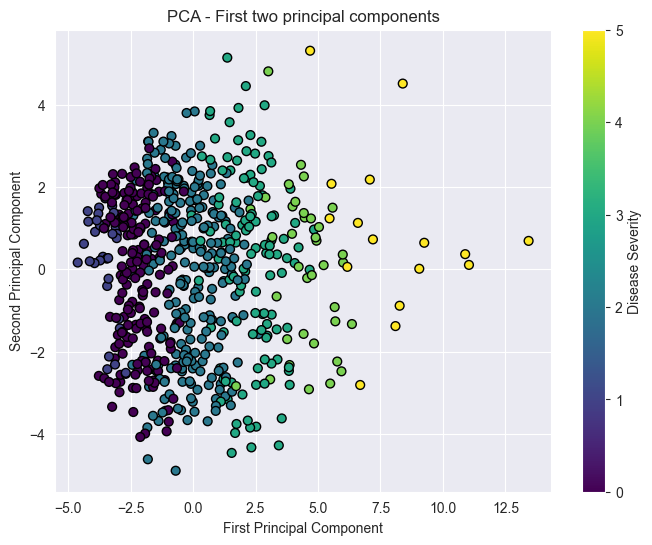

In [157]:
# 6. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First two principal components')
plt.colorbar(label='Disease Severity')
plt.show()


In [158]:

# 7. Noise Reduction
# Let's assume that components with very low explained variance represent noise.
threshold = 0.01  # Variance ratio threshold to determine if a component is considered noise
num_components = np.sum(explained_variance > threshold)
print(f"\nNumber of components to retain to reduce noise: {num_components}")


Number of components to retain to reduce noise: 15


In [159]:

# 8. Feature Importance
most_valuable_features = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]


print("\nMost valuable features for each principal component:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Principal Component {i+1}: {feature}")


Most valuable features for each principal component:
Principal Component 1: NP3RIGN
Principal Component 2: NP3FTAPL
Principal Component 3: NP3RIGN
Principal Component 4: NP3RTCON
Principal Component 5: NP3RIGN
Principal Component 6: NP1SLPN
Principal Component 7: NP3POSTR
Principal Component 8: NP2SALV
Principal Component 9: NP3TTAPR
Principal Component 10: NP3RIGRL
Principal Component 11: NP2HWRT
Principal Component 12: NP1URIN
Principal Component 13: NP1PAIN
Principal Component 14: NP1PAIN
Principal Component 15: NP3RTARU



Correlation matrix of principal components:
 [[ 1.00000000e+00  1.75646472e-17  2.90755409e-17  2.38093519e-17
   0.00000000e+00  6.34709510e-17  3.48359776e-17 -8.52743501e-18
  -5.32911742e-17  0.00000000e+00  3.68003960e-17  2.28485777e-17
  -1.31675596e-17 -2.17266791e-17  1.71517228e-17]
 [ 1.75646472e-17  1.00000000e+00  1.68489433e-16 -2.11557787e-16
   3.15492297e-17 -3.46351495e-17 -1.82906911e-17  2.27311346e-17
   1.77569347e-17 -2.54495226e-17  9.80968785e-18 -2.87612851e-17
   1.05300212e-17  4.18531170e-17  2.33364769e-17]
 [ 2.90755409e-17  1.68489433e-16  1.00000000e+00 -1.98954774e-16
   1.90585310e-16 -7.62382456e-17 -3.88846795e-17 -1.96319255e-17
   4.77117452e-17 -1.17224975e-16  5.64814336e-17 -2.53269701e-17
   0.00000000e+00 -2.08413855e-18 -5.26491015e-17]
 [ 2.38093519e-17 -2.11557787e-16 -1.98954774e-16  1.00000000e+00
  -5.98254230e-17  7.01694133e-18  8.13736171e-17  4.27953675e-18
   8.20163059e-17  6.89950253e-17 -8.66786692e-17  1.22311203e-17
   1.0573

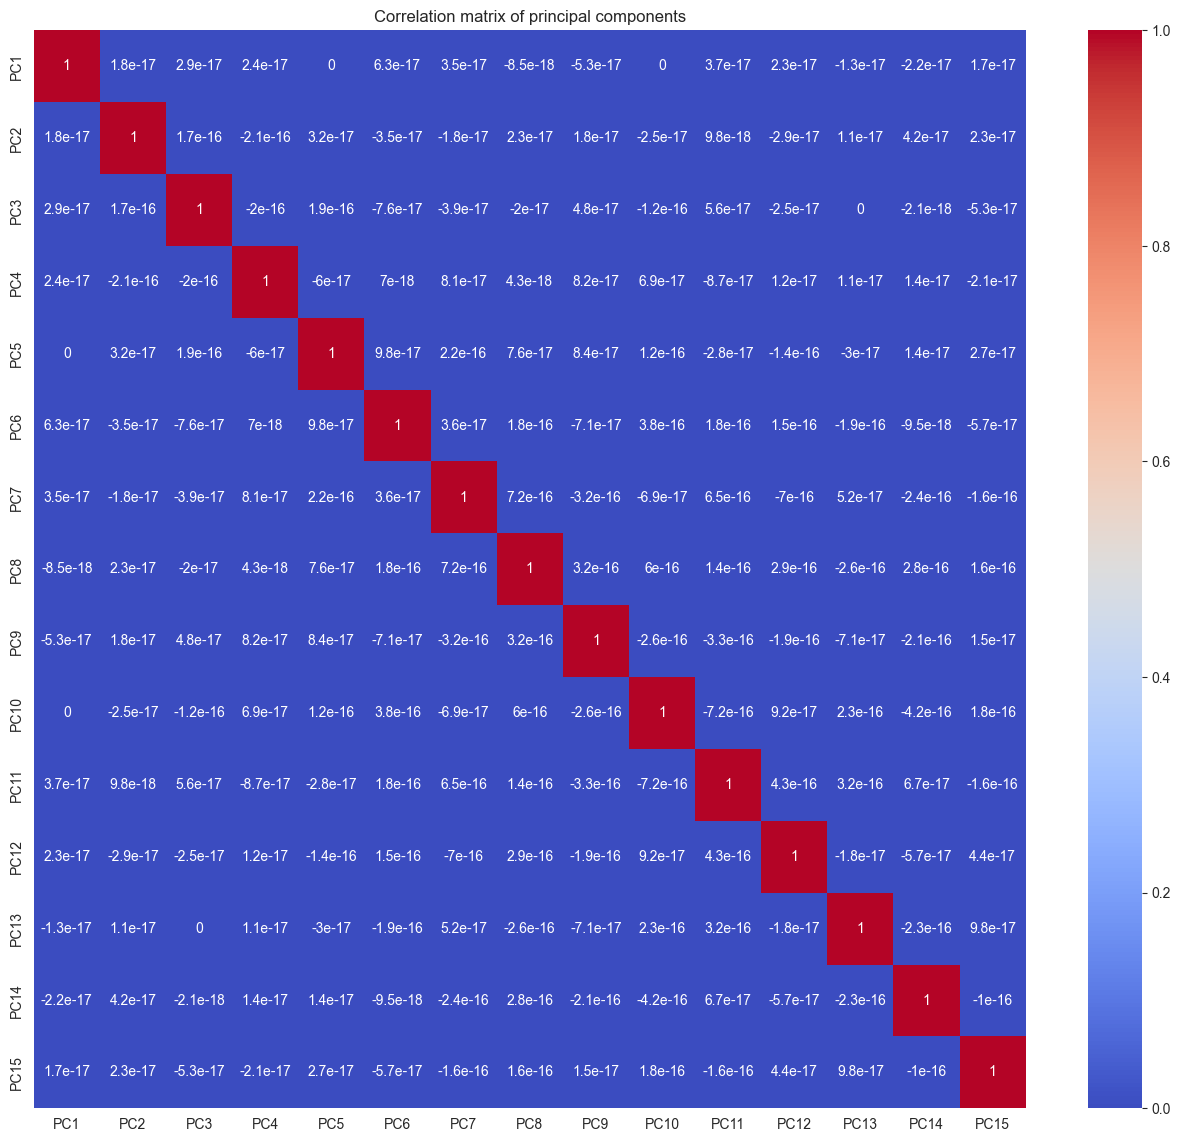

In [160]:
# 9. Multicollinearity
# PCA components are orthogonal, hence uncorrelated
correlation_matrix = np.corrcoef(X_train_pca.T)
print("\nCorrelation matrix of principal components:\n", correlation_matrix)

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=[f'PC{i+1}' for i in range(pca.n_components_)], yticklabels=[f'PC{i+1}' for i in range(pca.n_components_)])
plt.title('Correlation matrix of principal components')
plt.show()

In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy',
    'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L', 'DATSCAN_PUTAMEN_R',
    'DATSCAN_PUTAMEN_L', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L_ANT'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR',
    'NHY'
]
target_column = "Disease_Severity"

# Scale numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_components = min(X.shape[1], len(np.unique(y)) - 1)  # Ensure n_components is within valid range
print(n_components)
lda = LDA(n_components=n_components)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_lda, y_train)
    y_train_pred = clf.predict(X_train_lda)
    y_test_pred = clf.predict(X_test_lda)
    
    # Calculate metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    # Calculate metrics for testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Testing Precision: {test_precision:.4f}")
    print(f"Testing Recall: {test_recall:.4f}")
    print(f"Testing F1-score: {test_f1:.4f}")




5

Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.8869
Testing Precision: 0.8944
Testing Recall: 0.8869
Testing F1-score: 0.8807

Logistic Regression:
Training Accuracy: 0.9687
Testing Accuracy: 0.8431
Testing Precision: 0.8499
Testing Recall: 0.8431
Testing F1-score: 0.8377


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost:
Training Accuracy: 0.6959
Testing Accuracy: 0.6715
Testing Precision: 0.4821
Testing Recall: 0.6715
Testing F1-score: 0.5590

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.8759
Testing Precision: 0.8807
Testing Recall: 0.8759
Testing F1-score: 0.8742

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.8978
Testing Precision: 0.9051
Testing Recall: 0.8978
Testing F1-score: 0.8948

KNN:
Training Accuracy: 0.9655
Testing Accuracy: 0.8394
Testing Precision: 0.8472
Testing Recall: 0.8394
Testing F1-score: 0.8347

SVM:
Training Accuracy: 0.9702
Testing Accuracy: 0.8394
Testing Precision: 0.8470
Testing Recall: 0.8394
Testing F1-score: 0.8346

Naïve Bayes:
Training Accuracy: 0.9624
Testing Accuracy: 0.8796
Testing Precision: 0.8922
Testing Recall: 0.8796
Testing F1-score: 0.8772

XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.8869
Testing Precision: 0.8921
Testing Recall: 0.8869
Testing F1-score: 0.8847


In [162]:
# 1. Explained Variance
explained_variance = lda.explained_variance_ratio_
print("Explained variance ratio of each linear discriminant:\n", explained_variance)

Explained variance ratio of each linear discriminant:
 [0.92362371 0.03475038 0.02107651 0.01241896 0.00813044]


Cumulative explained variance:
 [0.92362371 0.95837409 0.9794506  0.99186956 1.        ]


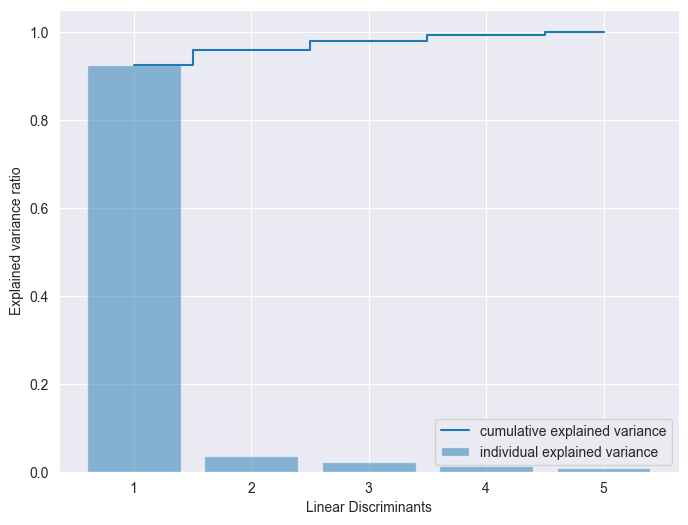

In [163]:
# 2. Cumulative Variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)

# Plot the explained variance ratio and cumulative variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Linear Discriminants')
plt.legend(loc='best')
plt.show()

In [164]:
# 3. Principal Component Scores
print("Linear Discriminant Scores (first 5 samples):\n", X_train_lda[:5])

Linear Discriminant Scores (first 5 samples):
 [[ 4.29976719e+00 -4.23718289e-01 -6.54289592e-01  5.84959613e-01
   3.60788615e-01]
 [-3.00900199e+00  2.02280357e-01 -8.38260373e-01  5.90544926e-01
  -1.98112973e-03]
 [ 1.65686421e+00 -2.07049123e-01 -1.35411301e-01 -1.01746120e+00
   1.66902653e-02]
 [-2.42482944e-01 -1.55867800e+00  2.82218850e-01 -1.22314946e-03
   1.53691532e+00]
 [ 1.60442108e+00  1.72180723e+00  1.04470617e+00  5.39491220e-01
  -4.86025283e-01]]


In [165]:
# 4. Loading Scores
loading_scores = pd.DataFrame(lda.scalings_, index=X.columns, columns=[f'LD{i+1}' for i in range(lda.scalings_.shape[1])])
print("\nLoading scores (contributions of each feature to the linear discriminants):")
print(loading_scores)


Loading scores (contributions of each feature to the linear discriminants):
                     LD1         LD2       LD3        LD4        LD5
Area           24.374534  107.969524  9.295143  50.636758  10.654502
Circularity     0.110994   -0.768668 -0.734394   2.105339  -1.575203
ConvexArea     -2.853626    2.059774 -2.928883   3.625951   3.807023
EquivDiameter  -4.117547   -6.808502 -9.806293   2.873568  -4.989898
Extent          0.212717   -0.835129  1.463125   0.698795   0.709583
...                  ...         ...       ...        ...        ...
NP3RTCON        0.302170    0.027591  0.089762  -0.413749   0.105568
NP3SPCH         0.246839    0.039250 -0.012518  -0.027639  -0.031611
NP3TTAPL        0.242019    0.187324  0.422444   0.161895  -0.368696
NP3TTAPR        0.091143   -0.130853 -0.094980   0.076149   0.386615
NHY            -0.230997    0.115506  1.026284  -0.612824   0.546602

[91 rows x 5 columns]


In [166]:
# 5. Correlation with Original Features
print("\nCorrelation of each feature with the first linear discriminant:")
correlations = loading_scores['LD1']
print(correlations)


Correlation of each feature with the first linear discriminant:
Area             24.374534
Circularity       0.110994
ConvexArea       -2.853626
EquivDiameter    -4.117547
Extent            0.212717
                   ...    
NP3RTCON          0.302170
NP3SPCH           0.246839
NP3TTAPL          0.242019
NP3TTAPR          0.091143
NHY              -0.230997
Name: LD1, Length: 91, dtype: float64


In [167]:
# Print top 20 features for each LDA component
print("Top 20 features for each LDA component:")
for i in range(n_components):
    component_features = np.abs(lda.scalings_[:, i])
    top_20_idx = component_features.argsort()[::-1][:5]
    top_20_features = X.columns[top_20_idx]
    print(f"Component {i+1}: {top_20_features.tolist()}")

# Example of printing the length of union of top 20 features
union_features = set()
for i in range(n_components):
    component_features = np.abs(lda.scalings_[:, i])
    top_20_idx = component_features.argsort()[::-1][:5]
    top_20_features = X.columns[top_20_idx]
    union_features.update(top_20_features.tolist())
print("\nUnion of top 20 features for each LDA component:")
print(union_features)
print(f"\nLength of union of top 20 features across all components: {len(union_features)}")

Top 20 features for each LDA component:
Component 1: ['Area', 'FilledArea', 'Shannon_Entropy', 'Standard Deviation', 'homogeneity']
Component 2: ['Area', 'FilledArea', 'homogeneity', 'Standard Deviation', 'gabor_energy']
Component 3: ['Shannon_Entropy', 'gabor_energy', 'gabor_entropy', 'Skewness', 'Kurtosis']
Component 4: ['FilledArea', 'Area', 'gabor_energy', 'Shannon_Entropy', 'Standard Deviation']
Component 5: ['Skewness', 'homogeneity', 'Standard Deviation', 'dissimilarity', 'Kurtosis']

Union of top 20 features for each LDA component:
{'homogeneity', 'Kurtosis', 'dissimilarity', 'Standard Deviation', 'gabor_energy', 'Area', 'Shannon_Entropy', 'gabor_entropy', 'FilledArea', 'Skewness'}

Length of union of top 20 features across all components: 10


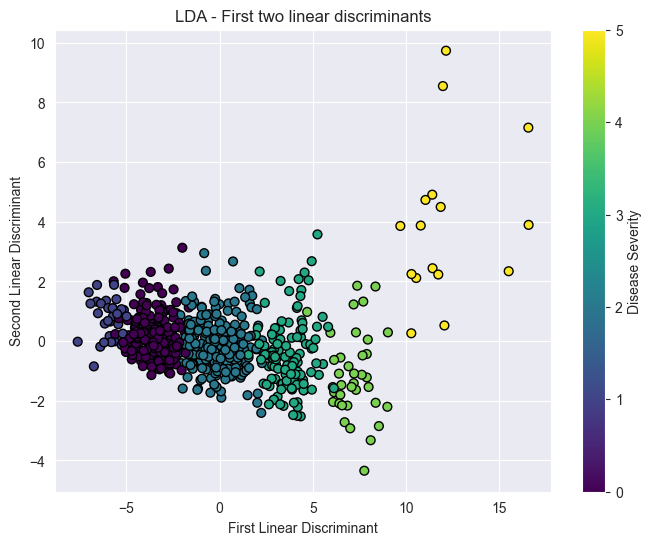

In [168]:
# 6. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant')
plt.title('LDA - First two linear discriminants')
plt.colorbar(label='Disease Severity')
plt.show()


In [169]:

# 7. Noise Reduction
# Let's assume that components with very low explained variance represent noise.
threshold = 0.01  # Variance ratio threshold to determine if a component is considered noise
num_components = np.sum(explained_variance > threshold)
print(f"\nNumber of components to retain to reduce noise: {num_components}")


Number of components to retain to reduce noise: 4


In [170]:
# 8. Feature Importance
most_valuable_features = [np.abs(lda.scalings_[:, i]).argmax() for i in range(lda.scalings_.shape[1])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]

print("\nMost valuable features for each linear discriminant:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Linear Discriminant {i+1}: {feature}")


Most valuable features for each linear discriminant:
Linear Discriminant 1: Area
Linear Discriminant 2: Area
Linear Discriminant 3: Shannon_Entropy
Linear Discriminant 4: FilledArea
Linear Discriminant 5: Skewness



Correlation matrix of linear discriminants:
 [[ 1.00000000e+00 -2.25292307e-15 -5.77263019e-15 -2.21462432e-15
   1.27361673e-15]
 [-2.25292307e-15  1.00000000e+00  2.97081329e-15  1.06233160e-15
  -2.79029968e-15]
 [-5.77263019e-15  2.97081329e-15  1.00000000e+00 -4.52570438e-15
  -2.33960314e-15]
 [-2.21462432e-15  1.06233160e-15 -4.52570438e-15  1.00000000e+00
  -1.95163200e-15]
 [ 1.27361673e-15 -2.79029968e-15 -2.33960314e-15 -1.95163200e-15
   1.00000000e+00]]


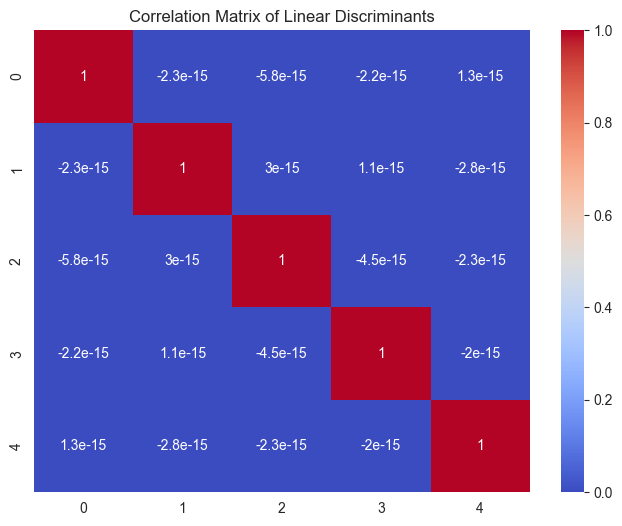

In [171]:
# 9. Multicollinearity
# LDA components are linear combinations, but we can check correlation among them
correlation_matrix = np.corrcoef(X_train_lda.T)
print("\nCorrelation matrix of linear discriminants:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Linear Discriminants')
plt.show()


In [172]:

# 10. Interpretation
# Interpretation often requires domain knowledge. The features contributing the most to each linear discriminant are the most important.
# These features can help in understanding the separation between classes.
print("\nInterpreting Linear Discriminants:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Linear Discriminant {i+1} is largely influenced by {feature}.")


Interpreting Linear Discriminants:
Linear Discriminant 1 is largely influenced by Area.
Linear Discriminant 2 is largely influenced by Area.
Linear Discriminant 3 is largely influenced by Shannon_Entropy.
Linear Discriminant 4 is largely influenced by FilledArea.
Linear Discriminant 5 is largely influenced by Skewness.
